In [2]:
# Initial imports
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sqlalchemy import create_engine

In [28]:
# # create a variable to hold the RDS instance address
# rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# # make a connection string for the engine to connect to the database
# # "postgresql://[user]:[password]@[location]:[port]/[database]"
# db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# # Create the database engine
# engine = create_engine(db_string)

In [29]:
# # Test the connection by import data in Postgres table into a Panda DataFrame
# # Connect to PostgreSQL server
# dbConnection = engine.connect()
# # Read data from PostgreSQL database table and load into a DataFrame instance
# marketing_df = pd.read_sql("select * from \"marketing_complete\"", dbConnection)
# # Print the DataFrame
# marketing_df

Exception during reset or similar
Traceback (most recent call last):
  File "/Users/bhaskarborah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sqlalchemy/pool/base.py", line 670, in _finalize_fairy
    fairy._reset(pool)
  File "/Users/bhaskarborah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sqlalchemy/pool/base.py", line 875, in _reset
    pool._dialect.do_rollback(self)
  File "/Users/bhaskarborah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sqlalchemy/engine/default.py", line 642, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.



id  year_birth   education marital_status   income  kid_home  \
0      1826        1970  Graduation       Divorced  84835.0         0   
1         1        1961  Graduation         Single  57091.0         0   
2     10476        1958  Graduation        Married  67267.0         0   
3      1386        1967  Graduation       Together  32474.0         1   
4      5371        1989  Graduation         Single  21474.0         1   
...     ...         ...         ...            ...      ...       ...   
2177  10142        1976         PhD       Divorced  66476.0         0   
2178   5263        1977    2n Cycle        Married  31056.0         1   
2179     22        1976  Graduation       Divorced  46310.0         1   
2180    528        1978  Graduation        Married  65819.0         0   
2181   4070        1969         PhD        Married  94871.0         0   

      teen_home dt_customer  recency  mnt_wines  ...  accepted_cmp2  response  \
0             0  2014-06-16        0        189  ...              0         1   
1             0  2014-06-15        0        464  ...              1         1   
2             1  2014-05-13        0        134  ...              0         0   
3             1  2014-05-11        0         10  ...              0         0   
4             0  2014-04-08        0          6  ...              0         1   
...         ...         ...      ...        ...  ...            ...       ...   
2177          1  2013-03-07       99        372  ...              0         0   
2178          0  2013-01-22       99          5  ...              0         0   
2179          0  2012-12-03       99        185  ...              0         0   
2180          0  2012-11-29       99        267  ...              0         0   
2181          2  2012-09-01       99        169  ...              0         1   

      complain  country    lat    long  per_capita_income  \
0            0       SP  40.42   -3.70            27057.2   
1            0       CA  45.42  -75.70            43241.6   
2            0       US  38.90  -77.01            63543.6   
3            0      AUS -35.28  149.13            51812.2   
4            0       SP  40.42   -3.70            27057.2   
...        ...      ...    ...     ...                ...   
2177         0       US  38.90  -77.01            63543.6   
2178         0       SP  40.42   -3.70            27057.2   
2179         0       SP  40.42   -3.70            27057.2   
2180         0      IND  28.64   77.22             1900.7   
2181         0       CA  45.42  -75.70            43241.6   

      currency_conv_to_usd  mnt_sum  purchases_sum  
0                     0.85     1190             15  
1                     1.26      577             18  
2                     1.00      251             11  
3                     1.36       11              4  
4                     0.85       91              8  
...                    ...      ...            ...  
2177                  1.00      689             20  
2178                  0.85       55              5  
2179                  0.85      309             14  
2180                 73.49     1383             20  
2181                  1.26     1078             18  

[2182 rows x 34 columns]

In [5]:
# Loading data
file_path = "Resources/market_complete.csv"
marketing_df = pd.read_csv(file_path)

marketing_df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1   5371        1989  Graduation         Single  21474.0        1         0   
2   7348        1958         PhD         Single  71691.0        0         0   
3   1991        1967  Graduation       Together  44931.0        0         1   
4   5642        1979      Master       Together  62499.0        1         0   
5  10311        1969  Graduation        Married   4428.0        0         1   
6    837        1977  Graduation        Married  54809.0        1         1   
7  10521        1977  Graduation        Married  54809.0        1         1   
8  10175        1958         PhD       Divorced  32173.0        0         1   
9   4065        1976         PhD        Married  49544.0        1         0   

  Dt_Customer  Recency  MntWines  ...  purchases_sum        Lat     Long  \
0  2014-06-16        0       189  ...             15  40.416775 -3.70379   
1  2014-04-08        0         6  ...              8  40.416775 -3.70379   
2  2014-03-17        0       336  ...             17  40.416775 -3.70379   
3  2014-01-18        0        78  ...              7  40.416775 -3.70379   
4  2013-12-09        0       140  ...             12  40.416775 -3.70379   
5  2013-10-05        0        16  ...             25  40.416775 -3.70379   
6  2013-09-11        0        63  ...             12  40.416775 -3.70379   
7  2013-09-11        0        63  ...             12  40.416775 -3.70379   
8  2013-08-01        0        18  ...              5  40.416775 -3.70379   
9  2013-02-12        0       308  ...             16  40.416775 -3.70379   

   Per Capita Income  Currency Conv to USD  Total_Dependents  Total_campaigns  \
0           27,057.2              0.846231                 0                0   
1           27,057.2              0.846231                 1                1   
2           27,057.2              0.846231                 0                0   
3           27,057.2              0.846231                 1                0   
4           27,057.2              0.846231                 1                0   
5           27,057.2              0.846231                 1                0   
6           27,057.2              0.846231                 2                0   
7           27,057.2              0.846231                 2                0   
8           27,057.2              0.846231                 1                0   
9           27,057.2              0.846231                 1                0   

   age  edu_classes  relation_status  
0   44            2                4  
1   25            2                1  
2   56            5                1  
3   47            2                2  
4   35            4                2  
5   45            2                3  
6   37            2                3  
7   37            2                3  
8   56            5                4  
9   38            5                3  

[10 rows x 39 columns]

In [6]:
marketing_df.dtypes

ID                        int64
Year_Birth                int64
Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Response                  int64
Complain                  int64
Country                  object
mnt_sum                   int64
purchases_sum             int64
Lat                     float64
Long    

In [7]:

#column_names = ["ID","Dependents", "Year_Customer", "TotalMnt", "TotalPurchases", "TotalCampaignsAcc", "Income"]

#marketing_df = pd.DataFrame(columns = column_names)

#df['ID'] = marketing_df["ID"]

#df['Income'] = marketing_df["Income"]

#df['Country'] = marketing_df["Country"]

#df['NumDealsPurchases'] = marketing_df["NumDealsPurchases"]

# Year becoming a Customer
marketing_df['Year_Customer'] = pd.DatetimeIndex(marketing_df['Dt_Customer']).year

# Get the total number of Dependents
marketing_df['Dependents'] = marketing_df['Kidhome'] + marketing_df['Teenhome']


# Total Amount Spent
mnt_cols = [col for col in marketing_df.columns if 'mnt' in col]
marketing_df['TotalMnt'] = marketing_df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in marketing_df.columns if 'purchases' in col]
marketing_df['TotalPurchases'] = marketing_df[purchases_cols].sum(axis=1)
#marketing_df['TotalPurchases'] = marketing_df['purchases_sum']

# Total Campaigns Accepted
campaigns_cols = [col for col in marketing_df.columns if 'Cmp' in col] + ['Response'] 
# 'Response' is for the latest campaign

marketing_df['TotalCampaignsAccepted'] = marketing_df[campaigns_cols].sum(axis=1)

marketing_df.head(20)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0    1826        1970  Graduation       Divorced  84835.0        0         0   
1    5371        1989  Graduation         Single  21474.0        1         0   
2    7348        1958         PhD         Single  71691.0        0         0   
3    1991        1967  Graduation       Together  44931.0        0         1   
4    5642        1979      Master       Together  62499.0        1         0   
5   10311        1969  Graduation        Married   4428.0        0         1   
6     837        1977  Graduation        Married  54809.0        1         1   
7   10521        1977  Graduation        Married  54809.0        1         1   
8   10175        1958         PhD       Divorced  32173.0        0         1   
9    4065        1976         PhD        Married  49544.0        1         0   
10   5985        1965      Master         Single  33168.0        0         1   
11   8432        1956  Graduation       Together  54450.0        1         1   
12    453        1956         PhD          Widow  35340.0        1         1   
13   8890        1971         PhD       Divorced  65808.0        1         1   
14   3068        1990  Graduation        Married  18351.0        0         0   
15   7962        1987         PhD         Single  95169.0        0         0   
16   2681        1984    2n Cycle        Married  65370.0        0         0   
17   3725        1961         PhD         Single  84865.0        0         0   
18   3767        1968  Graduation        Married  61314.0        0         1   
19   7030        1955         PhD        Married  66465.0        0         1   

   Dt_Customer  Recency  MntWines  ...  Total_Dependents  Total_campaigns  \
0   2014-06-16        0       189  ...                 0                0   
1   2014-04-08        0         6  ...                 1                1   
2   2014-03-17        0       336  ...                 0                0   
3   2014-01-18        0        78  ...                 1                0   
4   2013-12-09        0       140  ...                 1                0   
5   2013-10-05        0        16  ...                 1                0   
6   2013-09-11        0        63  ...                 2                0   
7   2013-09-11        0        63  ...                 2                0   
8   2013-08-01        0        18  ...                 1                0   
9   2013-02-12        0       308  ...                 1                0   
10  2012-10-13        0        80  ...                 1                0   
11  2012-09-14        0       454  ...                 2                0   
12  2014-06-29        1        27  ...                 2                0   
13  2014-05-30        1       155  ...                 2                0   
14  2013-10-29        1         1  ...                 0                0   
15  2013-10-09        1      1285  ...                 0                2   
16  2013-08-01        1        71  ...                 0                0   
17  2013-05-09        1      1248  ...                 0                4   
18  2013-04-25        1       378  ...                 1                0   
19  2013-03-30        1      1200  ...                 1                1   

    age  edu_classes  relation_status  Year_Customer  Dependents  TotalMnt  \
0    44            2                4           2014           0      1190   
1    25            2                1           2014           1        91   
2    56            5                1           2014           0      1192   
3    47            2                2           2014           1        96   
4    35            4                2           2013           1       222   
5    45            2                3           2013           1       359   
6    37            2                3           2013           2       174   
7    37            2                3           2013           2       174   
8    5

In [8]:
marketing_df.dtypes

ID                          int64
Year_Birth                  int64
Education                  object
Marital_Status             object
Income                    float64
Kidhome                     int64
Teenhome                    int64
Dt_Customer                object
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
AcceptedCmp3                int64
AcceptedCmp4                int64
AcceptedCmp5                int64
AcceptedCmp1                int64
AcceptedCmp2                int64
Response                    int64
Complain                    int64
Country                    object
mnt_sum                     int64
purchases_sum 

/Users/bhaskarborah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


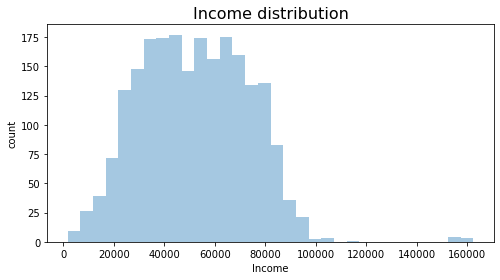

In [9]:
# This plot shows that most of the income is from 0 - 100,000 with a few outliers

plt.figure(figsize=(8,4))
sns.distplot(marketing_df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

<AxesSubplot:>

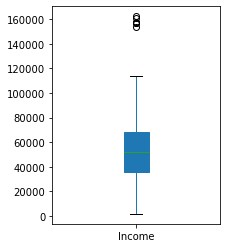

In [10]:
marketing_df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [11]:
marketing_df = marketing_df.drop(columns=['mnt_sum','purchases_sum','Currency Conv to USD','Total_campaigns','Total_Dependents'])

In [12]:
marketing_df.dtypes

ID                          int64
Year_Birth                  int64
Education                  object
Marital_Status             object
Income                    float64
Kidhome                     int64
Teenhome                    int64
Dt_Customer                object
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
AcceptedCmp3                int64
AcceptedCmp4                int64
AcceptedCmp5                int64
AcceptedCmp1                int64
AcceptedCmp2                int64
Response                    int64
Complain                    int64
Country                    object
Lat                       float64
Long          

In [13]:
df_sub_market1 = marketing_df[['Income','edu_classes','age','relation_status','Kidhome','Teenhome','TotalMnt','TotalPurchases','TotalCampaignsAccepted','NumWebVisitsMonth']]
df_sub_market1

Income  edu_classes  age  relation_status  Kidhome  Teenhome  TotalMnt  \
0     84835.0            2   44                4        0         0      1190   
1     21474.0            2   25                1        1         0        91   
2     71691.0            5   56                1        0         0      1192   
3     44931.0            2   47                2        0         1        96   
4     62499.0            4   35                2        1         0       222   
...       ...          ...  ...              ...      ...       ...       ...   
2177  64961.0            2   56                2        0         1      1009   
2178  45989.0            2   50                1        0         1       322   
2179  73455.0            2   46                5        0         0      2088   
2180  24401.0            4   35                2        0         0       467   
2181  44794.0            2   48                3        0         1        65   

      TotalPurchases  TotalCampaignsAccepted  NumWebVisitsMonth  
0                 15                       1                  1  
1                  8                       2                  7  
2                 17                       1                  2  
3                  7                       0                  5  
4                 12                       0                  4  
...              ...                     ...                ...  
2177              16                       0                  3  
2178              16                       0                  3  
2179              22                       1                  3  
2180              16                       0                  8  
2181               6                       0                  6  

[2182 rows x 10 columns]

In [14]:
df_sub_market1.corr(method='pearson', min_periods=1)

Income  edu_classes       age  relation_status  \
Income                  1.000000     0.120252  0.201194         0.038789   
edu_classes             0.120252     1.000000  0.147795         0.040226   
age                     0.201194     0.147795  1.000000         0.153398   
relation_status         0.038789     0.040226  0.153398         1.000000   
Kidhome                -0.511208    -0.033683 -0.239108        -0.057801   
Teenhome                0.037008     0.102184  0.365958         0.097968   
TotalMnt                0.787340     0.057340  0.116634         0.016849   
TotalPurchases          0.664753     0.073966  0.181607         0.057527   
TotalCampaignsAccepted  0.341900     0.049986 -0.007375        -0.000920   
NumWebVisitsMonth      -0.644011    -0.035158 -0.121789         0.003530   

                         Kidhome  Teenhome  TotalMnt  TotalPurchases  \
Income                 -0.511208  0.037008  0.787340        0.664753   
edu_classes            -0.033683  0.102184  0.057340        0.073966   
age                    -0.239108  0.365958  0.116634        0.181607   
relation_status        -0.057801  0.097968  0.016849        0.057527   
Kidhome                 1.000000 -0.041616 -0.557456       -0.480217   
Teenhome               -0.041616  1.000000 -0.136035        0.131840   
TotalMnt               -0.557456 -0.136035  1.000000        0.754148   
TotalPurchases         -0.480217  0.131840  0.754148        1.000000   
TotalCampaignsAccepted -0.193351 -0.161653  0.455816        0.256465   
NumWebVisitsMonth       0.448157  0.129822 -0.497530       -0.312666   

                        TotalCampaignsAccepted  NumWebVisitsMonth  
Income                                0.341900          -0.644011  
edu_classes                           0.049986          -0.035158  
age                                  -0.007375          -0.121789  
relation_status                      -0.000920           0.003530  
Kidhome                              -0.193351           0.448157  
Teenhome                             -0.161653           0.129822  
TotalMnt                              0.455816          -0.497530  
TotalPurchases                        0.256465          -0.312666  
TotalCampaignsAccepted                1.000000          -0.127058  
NumWebVisitsMonth                    -0.127058           1.000000

<AxesSubplot:>

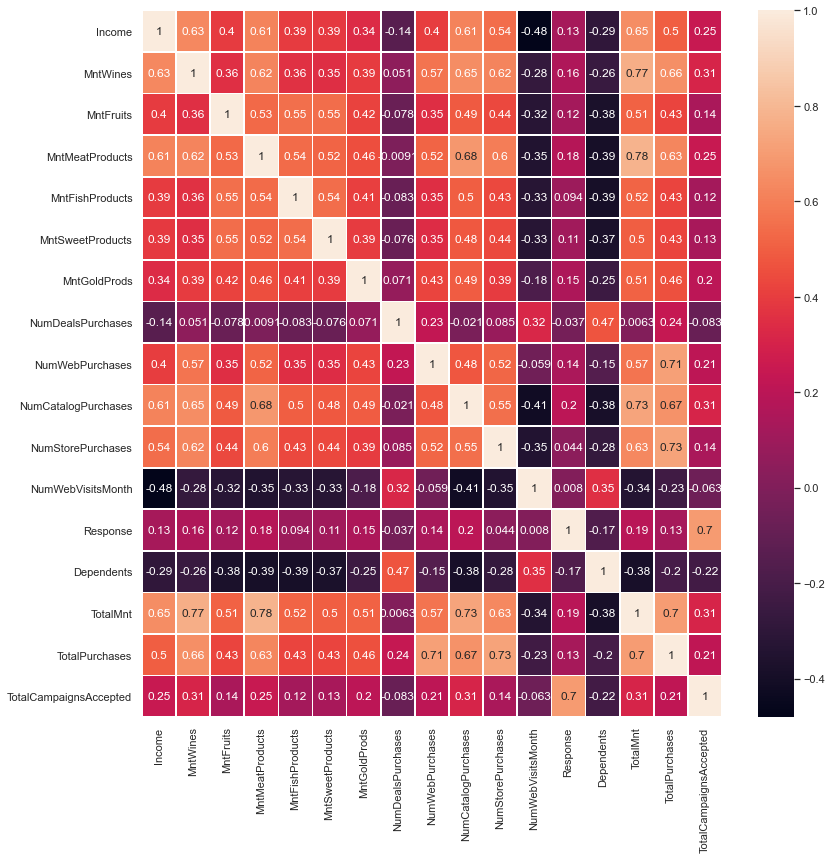

In [15]:
# calculate correlation matrix
import seaborn as sns; sns.set_theme()
corrs = marketing_df.drop(columns=['ID','edu_classes','age','relation_status','Kidhome','Teenhome','Lat','Long','Year_Birth','Year_Customer','Recency','Complain','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']).select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
#sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(corrs.iloc[:, 0:18:], annot=True, linewidths=.7, ax=ax)

#sns.heatmap(corrs, annot=True,vmax=1.0)

# This correlation matrix shows:

## The High Income Analysis

# The TotalMnt and all the Mnt Spent/ Mnt Fields are all positively correlated with Income
# This means the higher the income, more amount people spent

# Also The TotalPurchases made and the Number of purchases are positvely correlated to Income

## The dependents analysis

# It can be seen that the income, TotalMnt, Mnt fields, TotalPurchases and the number of purchases
# are all negatively correlated with Dependents

# The NumDealsPurchases is positively linked with dependents

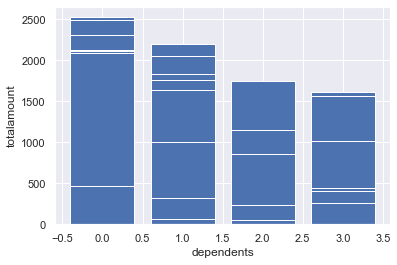

In [89]:
plt.bar(marketing_df.Dependents,marketing_df.TotalMnt)
plt.xlabel('dependents')
plt.ylabel('totalamount')
plt.show()

# This plot shows that the more the dependents the less the TotalMnt spent

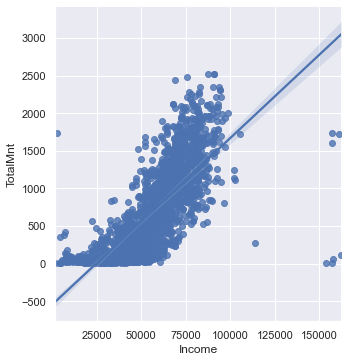

In [18]:
sns.lmplot(x='Income', y='TotalMnt', data=marketing_df[marketing_df['Income'] < 200000])

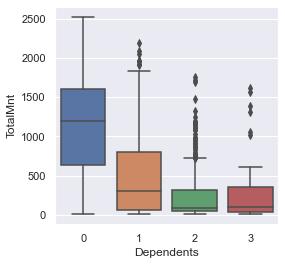

In [19]:
# Plot showing negative impact of having dependents on total amount purchased
# It can be seen that the total amount purchased decreases with the rise in dependents
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=marketing_df);

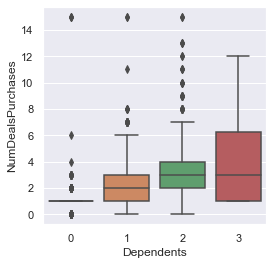

In [20]:
# Plot showing positive impact of having dependents on num_deals_purchases purchased
# It can be seen that the purchase deals increase with the rise in dependents
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=marketing_df);

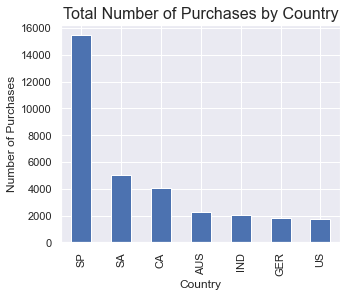

In [21]:
plt.figure(figsize=(5,4))
marketing_df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

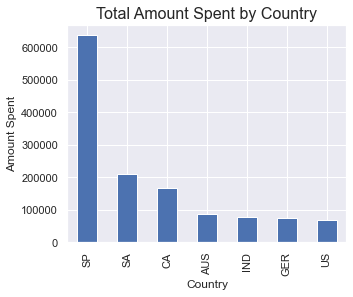

In [22]:
plt.figure(figsize=(5,4))
marketing_df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

## Begin campaign and purchase analysis 

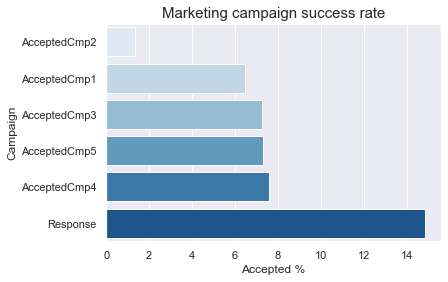

In [23]:
# Find out which campaigns have been the most successful
cam_success = pd.DataFrame(marketing_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted %')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=15);

# The most successful campaign is the most recent one

In [31]:
# list of channels to be considered
channel_cols = [col for col in marketing_df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAccepted']

# list of cols with binary responses
binary_cols = [col for col in marketing_df.columns if 'Accepted' in col] + ['Response']

# list of cols for spending 
mnt_cols = [col for col in marketing_df.columns if 'Mnt' in col]

In [32]:
# customer average details
demographics = pd.DataFrame(round(marketing_df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

Average
Year_Birth      1968.9
Year_Customer   2013.0
Income         51969.5
Dependents         1.0
Kidhome            0.4
Teenhome           0.5
Recency           49.2

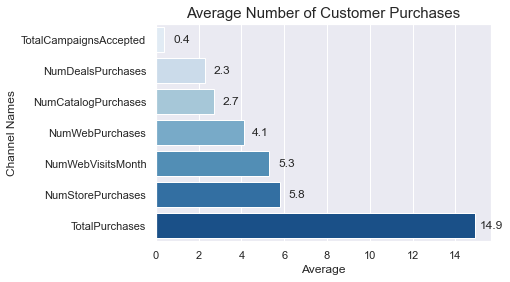

In [81]:
channels = pd.DataFrame(round(marketing_df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Channel Names')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

plt.title('Average Number of Customer Purchases', size=15);

# The below bar graph shows that:
# The customer accepted less than 1 campaign
# The average total purchases made by a customer is 15
# The worst performing channel is Deals, followed by Catalog
# The best performing channel is Store

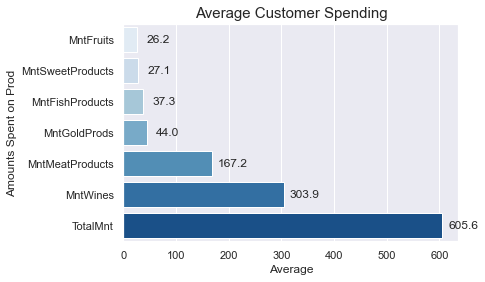

In [76]:
spending = pd.DataFrame(round(marketing_df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amounts Spent on Prod')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

plt.title('Average Customer Spending', size=15);

# The below bar chart tells us
# An average customer spends the least on fruits
# An average customer spends around $26-$38 on Fruits, Sweet and Fish
# An average customer spends the most on wine which is $304
# An average customer spends around $605 

# Perform analysis on Customers having Dependents and No Dependents

# Customer having no dependents analysis

In [37]:
marketing_df['Dependents'].unique()

array([0, 1, 2, 3])

In [51]:
marketing_df.count().unique()

array([2182])

In [52]:
marketing_having_no_dependents_df = marketing_df.loc[marketing_df['Dependents'] == 0]

In [53]:
marketing_having_no_dependents_df.count().unique()

array([617])

In [56]:
# list of channels to be considered
channel_no_dependents_cols = [col for col in marketing_having_no_dependents_df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAccepted']

# list of cols with binary responses
binary_no_dependents_cols = [col for col in marketing_having_no_dependents_df.columns if 'Accepted' in col] + ['Response']

# list of cols for spending 
mnt_no_dependents_cols = [col for col in marketing_having_no_dependents_df.columns if 'Mnt' in col]

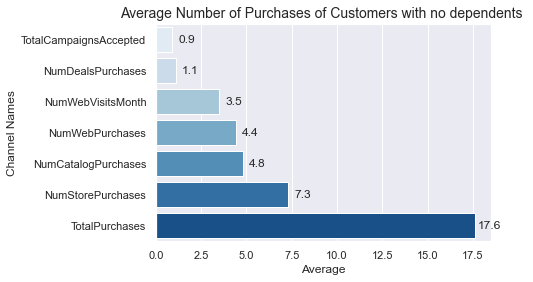

In [82]:
channels = pd.DataFrame(round(marketing_having_no_dependents_df[channel_no_dependents_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Channel Names')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;
    
plt.title('Average Number of Purchases of Customers with no dependents ', size=14);

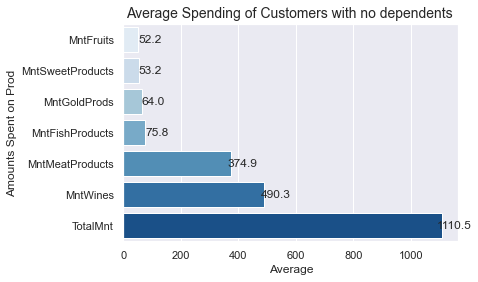

In [79]:
spending = pd.DataFrame(round(marketing_having_no_dependents_df[mnt_no_dependents_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amounts Spent on Prod')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

plt.title('Average Spending of Customers with no dependents ', size=14);

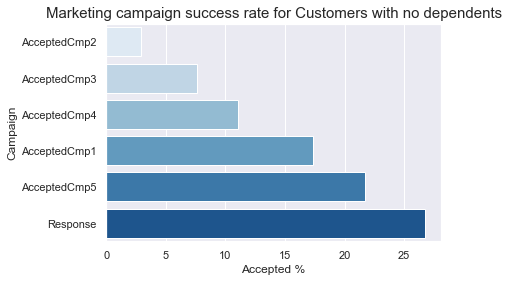

In [83]:
# Find out which campaigns have been the most successful
cam_success_no_dependents_df = pd.DataFrame(marketing_having_no_dependents_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success_no_dependents_df.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted %')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate for Customers with no dependents', size=15);


# Customer having  dependents analysis

In [64]:
marketing_having_dependents_df = marketing_df.loc[marketing_df['Dependents'] != 0]

In [65]:
marketing_having_dependents_df.count().unique()

array([1565])

In [84]:
# list of channels to be considered
channel_with_dependents_cols = [col for col in marketing_having_dependents_df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAccepted']

# list of cols with binary responses
binary_with_dependents_cols = [col for col in marketing_having_dependents_df.columns if 'Accepted' in col] + ['Response']

# list of cols for spending 
mnt_with_dependents_cols = [col for col in marketing_having_dependents_df.columns if 'Mnt' in col]

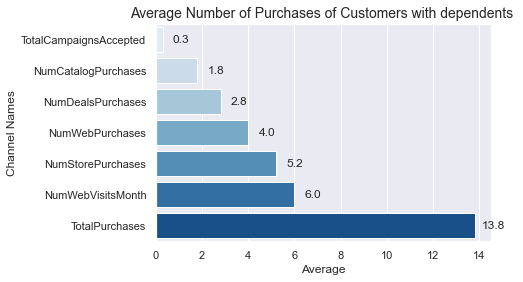

In [85]:
channels = pd.DataFrame(round(marketing_having_dependents_df[channel_with_dependents_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Channel Names')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;
    
    
        
plt.title('Average Number of Purchases of Customers with dependents ', size=14);

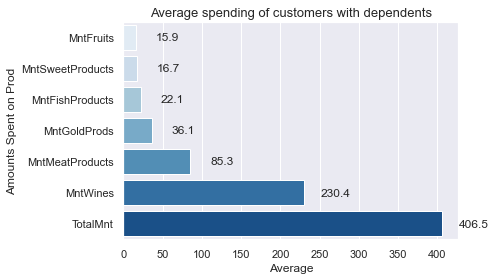

In [86]:
spending = pd.DataFrame(round(marketing_having_dependents_df[mnt_with_dependents_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amounts Spent on Prod')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

plt.title('Average spending of customers with dependents', size=13);

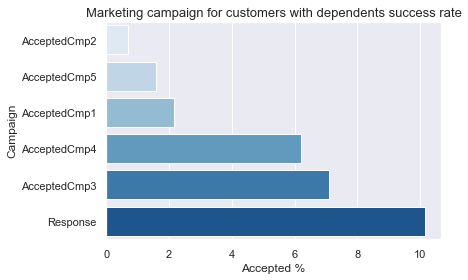

In [72]:
# Find out which campaigns have been the most successful
cam_success_with_dependents_df = pd.DataFrame(marketing_having_dependents_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success_with_dependents_df.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted %')
plt.ylabel('Campaign')
plt.title('Marketing campaign for customers with dependents success rate', size=13);